In [1]:
import numpy as np
import pandas as pd

In [2]:
df_eval = pd.read_csv("data/petitions/cls_result/1/eval_result_details.csv", index_col=0)

In [3]:
df_eval.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,pred,actual
0,0.004530,0.000845,0.068983,0.000284,0.009378,0.019895,0.001162,0.000391,0.005910,0.000623,0.111219,0.000968,0.002050,0.002161,0.000600,0.767048,0.003954,15.0,15.0
1,0.000354,0.000130,0.020536,0.000054,0.008954,0.006869,0.000491,0.000316,0.000194,0.002088,0.000838,0.002053,0.913303,0.000236,0.000176,0.039265,0.004143,12.0,12.0
2,0.046055,0.000355,0.037994,0.000732,0.000298,0.073106,0.000474,0.690497,0.008117,0.000936,0.009747,0.001780,0.003851,0.001765,0.029171,0.077244,0.017878,7.0,7.0
3,0.000623,0.000717,0.194655,0.002695,0.737302,0.021644,0.004188,0.000555,0.001637,0.001658,0.010931,0.001834,0.009875,0.000803,0.000240,0.006945,0.003699,4.0,4.0
4,0.000786,0.000305,0.102574,0.000074,0.000753,0.010524,0.000298,0.018734,0.000722,0.002348,0.000591,0.817583,0.016905,0.005976,0.007189,0.008834,0.005803,11.0,11.0


In [4]:
df_fail = df_eval.loc[df_eval['pred'] != df_eval['actual']] 

In [5]:
df_fail.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,pred,actual
10,0.025309,0.000558,0.098220,0.000537,0.006768,0.055933,0.000462,0.000349,0.023166,0.000839,0.004931,0.005416,0.003167,0.008502,0.000250,0.711279,0.054315,15.0,2.0
12,0.032065,0.031111,0.102298,0.000832,0.041680,0.068897,0.002961,0.007606,0.023652,0.051584,0.057304,0.012643,0.098146,0.047851,0.000865,0.381923,0.038583,15.0,16.0
13,0.023714,0.007139,0.159198,0.001129,0.000957,0.056296,0.000291,0.116452,0.010409,0.077696,0.020296,0.000451,0.020216,0.003671,0.000698,0.304926,0.196461,15.0,2.0
17,0.000983,0.000456,0.001910,0.003506,0.000223,0.002222,0.000836,0.953484,0.003130,0.003229,0.001464,0.003141,0.002782,0.002623,0.008566,0.003277,0.008167,7.0,9.0
18,0.346089,0.010689,0.302954,0.000800,0.000245,0.027393,0.000222,0.009774,0.039827,0.001112,0.000329,0.000622,0.004658,0.067683,0.001410,0.031556,0.154637,0.0,16.0


In [ ]:
#'경제민주화' : '0', 
#'교통/건축/국토' : '1', 
#'기타' : '2',
#'농산어촌' : '3',
#'문화/예술/체육/언론' : '4',
#'미래' : '5',
#'반려동물' : '6',
#'보건복지' : '7',
#'성장동력' : '8',
#'안전/환경' : '9',
#'외교/통일/국방' : '10',
#'육아/교육' : '11',
#'인권/성평등' : '12',
#'일자리' : '13',
#'저출산/고령화대책' : '14',
#'정치개혁' : '15',
#'행정' : '16',

In [12]:
df_fail.groupby('actual')['actual'].count() / len(df_fail)

actual
0.0     0.064449
1.0     0.044491
2.0     0.176715
3.0     0.006445
4.0     0.033264
5.0     0.088358
6.0     0.006445
7.0     0.044906
8.0     0.038877
9.0     0.077963
10.0    0.046570
11.0    0.026819
12.0    0.076715
13.0    0.048025
14.0    0.012058
15.0    0.116632
16.0    0.091268
Name: actual, dtype: float64

In [9]:
len(df_fail)

4810

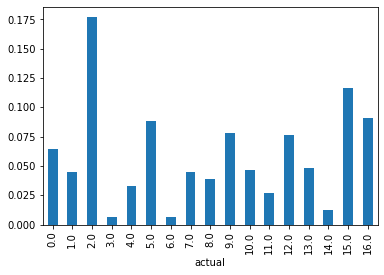

In [17]:
(df_fail.groupby('actual')['actual'].count() / len(df_fail)).plot.bar(x='actual', y='val')

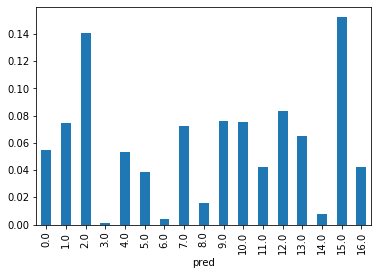

In [20]:
(df_fail.groupby('pred')['pred'].count() / len(df_fail)).plot.bar(x='pred', y='val')

In [29]:
df_exam = pd.read_csv("dev.tsv", names=['doc_idx', 'contents', 'category_label'], sep='\t', header=0)

In [30]:
df_exam.head(5)

,doc_idx,contents,category_label
0,33706,진정으로 내전인가 평화인가 답해야한다 가면갈수록 남남갈등은 심해질것이다 당장 박대통...,15
1,60512,1. 최근 미투운동 매우 바람직합니다. 우리 사회의 어두운 관행을 척결하기 위해 반...,12
2,194312,해주기 바랍니다. 개개인의 힘이 작고 분산되어 우리의 요구를 반영하기 힘듭니다. 국...,7
3,149161,자랑스러운 우리나라 대한민국과 독일전을 정말 감명깊게 보았습니다. 우리나라는 멕시코...,4
4,281201,이혼한지 십년이 넘었고 아이셋을 제가키우고 있습니다 ᆢ 아무리 양육비를 달라고 해도...,11


In [28]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,pred,actual
0,0.004530,0.000845,0.068983,0.000284,0.009378,0.019895,0.001162,0.000391,0.005910,0.000623,0.111219,0.000968,0.002050,0.002161,0.000600,0.767048,0.003954,15.0,15.0
1,0.000354,0.000130,0.020536,0.000054,0.008954,0.006869,0.000491,0.000316,0.000194,0.002088,0.000838,0.002053,0.913303,0.000236,0.000176,0.039265,0.004143,12.0,12.0
2,0.046055,0.000355,0.037994,0.000732,0.000298,0.073106,0.000474,0.690497,0.008117,0.000936,0.009747,0.001780,0.003851,0.001765,0.029171,0.077244,0.017878,7.0,7.0
3,0.000623,0.000717,0.194655,0.002695,0.737302,0.021644,0.004188,0.000555,0.001637,0.001658,0.010931,0.001834,0.009875,0.000803,0.000240,0.006945,0.003699,4.0,4.0
4,0.000786,0.000305,0.102574,0.000074,0.000753,0.010524,0.000298,0.018734,0.000722,0.002348,0.000591,0.817583,0.016905,0.005976,0.007189,0.008834,0.005803,11.0,11.0


In [37]:
df_exam.loc[(df['pred'] != df['actual']) & (df['pred'] == 15.0)]

,doc_idx,contents,category_label
10,136321,지방선거 패배 책임이 자신에게 있다며 사퇴한다고 하셨는데요. 패배가 아닙니다. 한 ...,2
12,125382,인가요?,16
13,191694,문재인 대통령 내외분 및 주변 참모분들 그리고 관계 부처 공무원분들 늘 노고가 많으...,2
28,198950,김부선 당신 스캔들로 tv에서 그만 보고십다 짜증난다 좀 조용히 살어라,12
88,139860,현재 문재인 정권의 대북기조 이하 여론의 흐름이 좋은 기류를 타고 흘러 지방동시선거...,2
...,...,...,...
9925,50818,문제많은 적폐 부서..믿을 수가 없습니다. 세금 낭비가 너무 심하고 대체 무슨 일하...,12
9926,89286,적페청산 파이팅,4
9950,54859,토탈에 독점적인 지위를 이용하여 뉴스인물검색등 네이버 마음대로 삭제하고 특히 뉴스의...,0
9970,14712,신중하지 못한 청와대 일처리로 인해 아마 대통령여당 지지자들 많이 이탈될겁니다. 가...,5


In [6]:
from sklearn.metrics import classification_report

In [8]:
print(classification_report(df_eval['actual'], df_eval['pred'], target_names=['경제민주화', 
'교통/건축/국토', 
'농산어촌',
'기타',
'문화/예술/체육/언론',
'미래',
'반려동물',
'보건복지',
'성장동력',
'안전/환경',
'외교/통일/국방',
'육아/교육',
'인권/성평등',
'일자리',
'저출산/고령화대책',
'정치개혁',
'행정']))

              precision    recall  f1-score   support

       경제민주화       0.40      0.36      0.38       486
    교통/건축/국토       0.64      0.75      0.69       846
        농산어촌       0.33      0.28      0.31      1185
          기타       0.72      0.37      0.49        49
 문화/예술/체육/언론       0.58      0.69      0.63       516
          미래       0.28      0.14      0.19       496
        반려동물       0.81      0.72      0.76       111
        보건복지       0.53      0.64      0.58       607
        성장동력       0.29      0.15      0.20       219
       안전/환경       0.48      0.48      0.48       719
    외교/통일/국방       0.58      0.69      0.63       724
       육아/교육       0.68      0.77      0.73       573
      인권/성평등       0.53      0.55      0.54       815
         일자리       0.54      0.61      0.57       596
   저출산/고령화대책       0.54      0.43      0.48       101
        정치개혁       0.54      0.60      0.57      1413
          행정       0.34      0.19      0.25       544

    accuracy              